# __Cleaning Method 1__
## Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../Capstone/Data/FirstClean_MLB_Batting_Data.csv')

## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [3]:
data.skew()

age                   0.516150
mlb_ID                1.249463
year_ID              -0.166125
stint_ID              3.805262
PA                    0.532329
G                     0.157996
Inn                   0.477562
runs_bat              1.733955
runs_br               1.564463
runs_dp              -0.023148
runs_field            0.439512
runs_infield          0.405625
runs_outfield         0.786833
runs_catcher          1.631975
runs_good_plays       0.296850
runs_defense          0.468253
runs_position        -0.219672
runs_position_p       0.000000
runs_replacement      0.542947
runs_above_rep        1.817772
runs_above_avg        1.697316
runs_above_avg_off    1.862699
runs_above_avg_def    0.509141
WAA                   1.618253
WAA_off               1.749793
WAA_def               0.568643
WAR                   1.800244
WAR_def               0.568643
WAR_off               1.798807
WAR_rep               0.543498
salary                3.152264
teamRpG               0.088245
oppRpG  

**_Applying the yeojohnson normalization method actually increased the skew in my data, therefore I removed the cells_**

In [4]:
data.dtypes

name_common            object
age                   float64
mlb_ID                float64
player_ID              object
year_ID                 int64
team_ID                object
stint_ID                int64
lg_ID                  object
PA                      int64
G                       int64
Inn                   float64
runs_bat              float64
runs_br               float64
runs_dp               float64
runs_field            float64
runs_infield          float64
runs_outfield         float64
runs_catcher          float64
runs_good_plays       float64
runs_defense          float64
runs_position         float64
runs_position_p       float64
runs_replacement      float64
runs_above_rep        float64
runs_above_avg        float64
runs_above_avg_off    float64
runs_above_avg_def    float64
WAA                   float64
WAA_off               float64
WAA_def               float64
WAR                   float64
WAR_def               float64
WAR_off               float64
WAR_rep   

In [5]:
data.columns

Index(['name_common', 'age', 'mlb_ID', 'player_ID', 'year_ID', 'team_ID',
       'stint_ID', 'lg_ID', 'PA', 'G', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary', 'pitcher', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'OPS_plus', 'TOB_lg', 'TB_lg'],
      dtype='object')

## Z Score

In [6]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['name_common', 'player_ID', 'team_ID', 'lg_ID', 'pitcher'], axis=1)

In [7]:
data_num.head()

,age,mlb_ID,year_ID,stint_ID,PA,G,Inn,runs_bat,runs_br,runs_dp,...,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg
0,26.0,110001.0,1960,1,664,153,1378.3,41.16,2.44,1.50,...,4.07285,1.854,1.828,0.5366,0.5266,0.5052,0.4824,156.1662,211.285,229.687
1,27.0,110001.0,1961,1,671,155,1376.0,43.88,4.49,0.95,...,4.38978,1.894,1.867,0.5452,0.5295,0.5132,0.4829,163.3027,218.152,244.516
2,28.0,110001.0,1962,1,667,156,1340.7,56.87,-0.16,-0.10,...,4.34324,1.891,1.861,0.5382,0.5343,0.5015,0.4831,169.8299,222.244,239.464
3,29.0,110001.0,1963,1,714,161,1446.0,61.53,6.80,0.02,...,3.65096,1.809,1.773,0.5396,0.5429,0.4914,0.4813,179.1695,224.696,238.707
4,30.0,110001.0,1964,1,634,145,1233.3,38.09,5.57,-2.22,...,3.86564,1.827,1.802,0.5299,0.5270,0.4983,0.4820,152.6831,204.402,223.896


In [8]:
data_objects=data.drop(['age', 'mlb_ID', 'year_ID',
       'stint_ID', 'PA', 'G', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'OPS_plus', 'TOB_lg', 'TB_lg'], axis=1)

In [9]:
data_objects.head()

,name_common,player_ID,team_ID,lg_ID,pitcher
0,Hank Aaron,aaronha01,MLN,NL,N
1,Hank Aaron,aaronha01,MLN,NL,N
2,Hank Aaron,aaronha01,MLN,NL,N
3,Hank Aaron,aaronha01,MLN,NL,N
4,Hank Aaron,aaronha01,MLN,NL,N


In [10]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num = scaler.fit_transform(data_num)
data_num_zs = pd.DataFrame(data_num)

In [12]:
data_num_zs.columns=['age', 'mlb_ID', 'year_ID',
       'stint_ID', 'PA', 'G', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'OPS_plus', 'TOB_lg', 'TB_lg']

In [1]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Batting Stats Box Plot')
plt.show()

NameError: name 'data_num_zs' is not defined

**_The data clearly has not been scaled correctly. Lets see what 3 STD does_**

## 3 STD

In [14]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [15]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

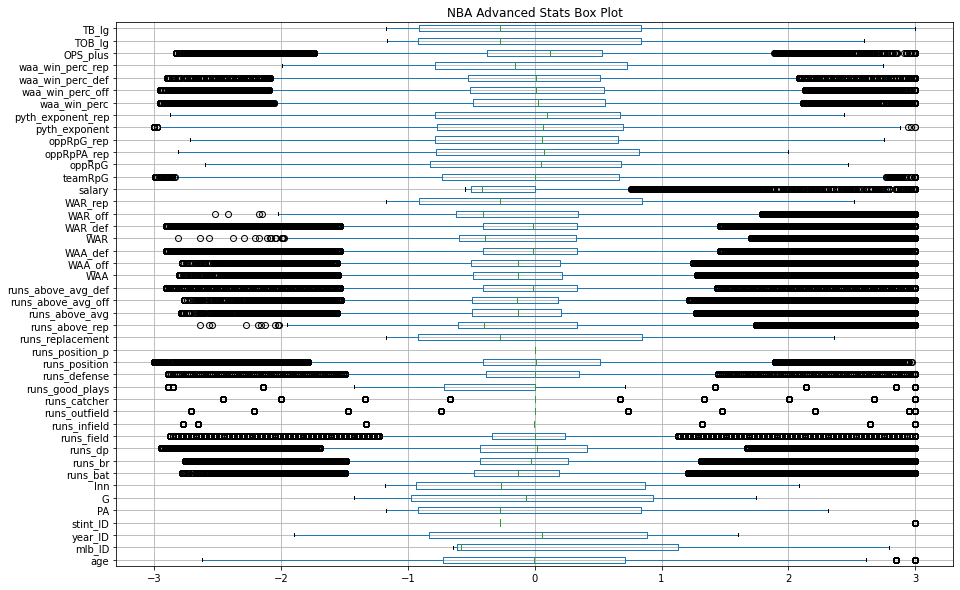

In [16]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Batting Stats Box Plot')
plt.show()

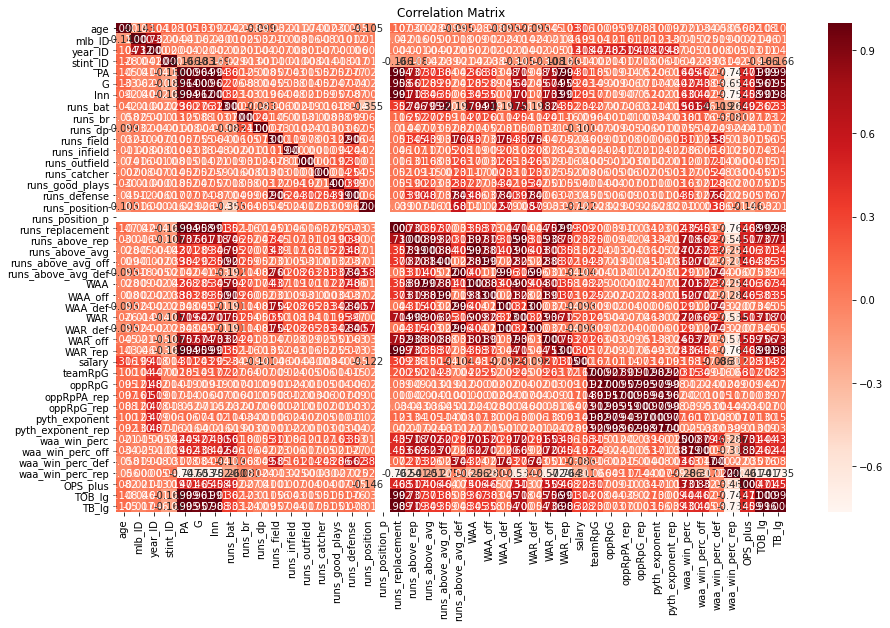

In [17]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [20]:
MLB_Bpipeline1=pd.concat([data_num_zs, data_objects], axis=1)

In [21]:
MLB_Bpipeline1.head()

,age,mlb_ID,year_ID,stint_ID,PA,G,Inn,runs_bat,runs_br,runs_dp,...,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg,name_common,player_ID,team_ID,lg_ID,pitcher
0,-0.482048,-0.645833,-1.899144,-0.271069,1.803485,1.514090,1.838357,3.000042,1.470890,1.648867,...,0.554948,-1.692645,1.333030,1.700119,1.655725,Hank Aaron,aaronha01,MLN,NL,N
1,-0.243918,-0.645833,-1.839840,-0.271069,1.834864,1.552709,1.833314,3.000042,2.722790,1.050723,...,1.318595,-1.566606,1.456844,1.793352,1.838187,Hank Aaron,aaronha01,MLN,NL,N
2,-0.005788,-0.645833,-1.780537,-0.271069,1.816933,1.572018,1.755907,3.000042,-0.116887,-0.091187,...,0.201761,-1.516191,1.570087,1.848909,1.776025,Hank Aaron,aaronha01,MLN,NL,N
3,0.232342,-0.645833,-1.721233,-0.271069,2.027621,1.668565,1.986811,3.000042,3.000042,0.039317,...,-0.762344,-1.969929,1.732124,1.882200,1.766711,Hank Aaron,aaronha01,MLN,NL,N
4,0.470472,-0.645833,-1.661929,-0.271069,1.669003,1.359614,1.520399,3.000042,3.000042,-2.396758,...,-0.103698,-1.793475,1.272600,1.606669,1.584471,Hank Aaron,aaronha01,MLN,NL,N


In [22]:
MLB_Bpipeline1.to_csv('../Capstone/Data/MLB_Bpipeline1.csv', index=0)